# TODO:
- check for meaningful dichotomies, look at PCA space for geometry if find any
- ensure multiple iterations per decoding pair group work
- revise classes in multi decoding: concept decoder, concept dataset, multiresultsmanager (should be not super big changes)
- decode across patients - without and with pseudopops

In [10]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from data_structures import PatientData
from decoders import ConceptDecoder, SingleResultsManager
from sklearn.svm import LinearSVC
from copy import deepcopy


generate 35 permutations of 4 groups - 8 choose 4, but will some repeats where incl = x, excl = y vs incl = y, excl = x

In [15]:
def generate_consistent_combinations(strings_list, group_size):
    all_combos = list(combinations(strings_list, group_size))
    unique_pairs = []
    seen = set()
    
    for combo in all_combos:
        # Find the complement (the 4 items not in this combination)
        complement = tuple(c for c in strings_list if c not in combo)
        
        # order is alphabetic so we end up with duplicate (s1, s2), (s1, s2) instead of (s1, s2), (s2, s1)
        if combo < complement:
            pair = (combo, complement)
        else:
            pair = (complement, combo)

        pair_str = str(pair)  
        if pair_str not in seen:
            unique_pairs.append(pair)
            seen.add(pair_str)
    
    return unique_pairs

In [16]:
best_concepts = [
    "A.Fayed", 
    "R.Wallace", 
    "T.Lennox", 
    "N.Yassir", 
    "K.Hayes", 
    "M.OBrian", 
    "J.Bauer", 
    "C.Manning"
]
t = generate_consistent_combinations(best_concepts, 4)

# Proof of concept: p563 MTL neurons only, 1 iteration

In [12]:
p563 = PatientData(pid='563')

# Set a threshold for neuron filtering
THRESHOLD = 0.1  # firing rate threshold

p563_fr_neurons = p563.filter_neurons_by_fr(
    neurons=p563.neurons, 
    window=(p563.times_dict['movie_start_rel'], p563.times_dict['preSleep_recall_start_rel']), 
    threshold=THRESHOLD
)
p563_mtl_fr_neurons = p563.filter_mtl_neurons(neurons=p563_fr_neurons)


./Data/40m_act_24_S06E01_30fps_character_frames.csv


In [7]:
combinations[0]

(('A.Fayed', 'R.Wallace', 'T.Lennox', 'N.Yassir'),
 ('K.Hayes', 'M.OBrian', 'J.Bauer', 'C.Manning'))

In [13]:
group_manager = SingleResultsManager(
    patient_data=p563,
    concept_items=combinations,  # Note: using 'concept_items' instead of 'concept_pairs'
    epoch='movie',
    classifier=LinearSVC(random_state=42),
    standardize=True,
    pseudo=False,  # Use pseudopopulations for balanced datasets
    neurons=p563_mtl_fr_neurons
)


In [14]:
num_iterations = 1
group_manager.run_decoding(num_iter=num_iterations)  # Using the new method name


Decoding for 563:   0%|          | 0/35 [00:00<?, ?it/s]

Decoding for 563:   6%|▌         | 2/35 [00:51<14:13, 25.88s/it]

Decoding for 563:   9%|▊         | 3/35 [01:17<13:53, 26.04s/it]

Decoding for 563:  11%|█▏        | 4/35 [01:43<13:25, 25.99s/it]

Decoding for 563:  14%|█▍        | 5/35 [02:09<12:55, 25.85s/it]

Decoding for 563:  20%|██        | 7/35 [03:02<12:14, 26.22s/it]

Decoding for 563:  23%|██▎       | 8/35 [03:28<11:51, 26.35s/it]

Decoding for 563:  26%|██▌       | 9/35 [03:55<11:24, 26.32s/it]

Decoding for 563:  29%|██▊       | 10/35 [04:21<10:54, 26.20s/it]

Decoding for 563:  31%|███▏      | 11/35 [04:46<10:26, 26.11s/it]

Decoding for 563:  34%|███▍      | 12/35 [05:12<09:56, 25.94s/it]

Decoding for 563:  37%|███▋      | 13/35 [05:39<09:34, 26.13s/it]

Decoding for 563:  46%|████▌     | 16/35 [06:59<08:23, 26.48s/it]

Decoding for 563:  49%|████▊     | 17/35 [07:25<07:55, 26.44s/it]

Decoding for 563:  51%|█████▏    | 18/35 [07:52<07:31, 26.59s/it]

Decoding for 563:  57%|█████▋    | 20/35 [08:45<06:38, 26.55s/it]

Decoding for 563:  60%|██████    | 21/35 [09:13<06:17, 26.94s/it]

Decoding for 563:  63%|██████▎   | 22/35 [09:39<05:49, 26.87s/it]

Decoding for 563:  66%|██████▌   | 23/35 [10:06<05:22, 26.90s/it]

Decoding for 563:  69%|██████▊   | 24/35 [10:32<04:52, 26.59s/it]

Decoding for 563:  71%|███████▏  | 25/35 [10:59<04:26, 26.63s/it]

Decoding for 563:  74%|███████▍  | 26/35 [11:26<03:59, 26.66s/it]

Decoding for 563:  77%|███████▋  | 27/35 [11:53<03:34, 26.78s/it]

Decoding for 563:  80%|████████  | 28/35 [12:19<03:06, 26.70s/it]

Decoding for 563:  83%|████████▎ | 29/35 [12:47<02:41, 26.93s/it]

Decoding for 563:  89%|████████▊ | 31/35 [13:43<01:50, 27.59s/it]

Decoding for 563:  91%|█████████▏| 32/35 [14:09<01:21, 27.13s/it]

Decoding for 563:  94%|█████████▍| 33/35 [14:35<00:53, 26.72s/it]

Decoding for 563: 100%|██████████| 35/35 [15:29<00:00, 26.57s/it]


In [31]:
def plot_dichotomy_performance_with_key(results_manager, dichotomy_list, metric='test_roc_auc', figsize=(15, 12), title_suffix=""):
    """
    Plots decoding performance for dichotomies (1-N) and adds a text key below
    mapping numbers to the actual group comparisons.

    Args:
        results_manager: A SingleResultsManager object that has run decoding
                         on the items in dichotomy_list.
        dichotomy_list: The list of group-vs-group tuples exactly as used
                        when running the results_manager. The order determines
                        the x-axis order (1-N).
        metric (str): The performance metric from DecodingResult to plot.
        figsize (tuple): Figure size for the *entire* plot (bars + text key).
        title_suffix (str): Optional text to append to the plot title.
    """
    if not results_manager.results:
        print("Error: results_manager has no results. Did you run run_decoding?")
        return None

    expected_num_dichotomies = len(dichotomy_list)
    print(f"Expecting {expected_num_dichotomies} dichotomies based on input list.")

    performance_means = []
    performance_stds = []
    dichotomy_labels_numeric = [str(i + 1) for i in range(expected_num_dichotomies)]
    key_strings = [] # To store formatted strings for the text key

    found_count = 0
    missing_keys_indices = []

    # --- Data Processing ---
    for i, dichotomy_key in enumerate(dichotomy_list):
        # Format the key string regardless of results being present
        group1, group2 = dichotomy_key
        group1_str = '+'.join(group1)
        group2_str = '+'.join(group2)
        key_strings.append(f"{i+1}: ({group1_str}) vs ({group2_str})")

        if dichotomy_key in results_manager.results:
            results_for_key = results_manager.results[dichotomy_key]
            if results_for_key:
                try:
                    values = [getattr(r, metric) for r in results_for_key]
                    performance_means.append(np.mean(values))
                    performance_stds.append(np.std(values))
                    found_count += 1
                except AttributeError:
                    print(f"Error: Metric '{metric}' not found for dichotomy {i+1}. Plotting NaN.")
                    performance_means.append(np.nan)
                    performance_stds.append(np.nan)
                except Exception as e:
                     print(f"Error processing results for dichotomy {i+1}: {e}")
                     performance_means.append(np.nan)
                     performance_stds.append(np.nan)
            else:
                performance_means.append(np.nan)
                performance_stds.append(np.nan)
                missing_keys_indices.append(i + 1)
        else:
            performance_means.append(np.nan)
            performance_stds.append(np.nan)
            missing_keys_indices.append(i + 1)

    print(f"Processed results for {found_count}/{expected_num_dichotomies} dichotomies.")
    if missing_keys_indices:
         print(f"Missing or empty results for dichotomies (numbered 1 to {expected_num_dichotomies}): {sorted(list(set(missing_keys_indices)))}")


    # --- Plotting ---
    fig = plt.figure(figsize=figsize)

    # Define grid: 2 rows, 1 column. Top plot (bars) taller than bottom (text).
    # Adjust height_ratios if needed (e.g., [4, 1] for more space for bars)
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

    # --- Top Subplot: Bar Chart ---
    ax_bar = fig.add_subplot(gs[0])

    x_positions = np.arange(expected_num_dichotomies)
    plot_stds = np.array(performance_stds)
    plot_stds[np.isnan(performance_means)] = 0 # Avoid error bars for NaN means

    ax_bar.bar(x_positions,
               np.nan_to_num(performance_means, nan=0.0),
               yerr=plot_stds,
               align='center',
               alpha=0.75,
               ecolor='black',
               capsize=4)

    ax_bar.set_ylabel(f'{metric.replace("_", " ").title()}')
    # Remove x-label from bar chart, it's implied by the key below
    ax_bar.set_xlabel('')
    ax_bar.set_xticks(x_positions)
    ax_bar.set_xticklabels(dichotomy_labels_numeric, rotation=90, fontsize=8)

    if "roc_auc" in metric.lower() or "accuracy" in metric.lower():
         ax_bar.set_ylim(0.0, 1.05)
         ax_bar.axhline(0.5, color='grey', linestyle='--', linewidth=0.8, label='Chance (0.5)')
         ax_bar.legend(loc='lower right')

    ax_bar.grid(axis='y', linestyle=':', linewidth=0.5) # Add horizontal grid lines

    # --- Bottom Subplot: Text Key ---
    ax_text = fig.add_subplot(gs[1])
    ax_text.axis('off') # Hide axes lines and ticks

    # Calculate positions for text lines
    num_lines = len(key_strings)
    # Split into two columns if too many lines
    if num_lines > 20: # Adjust this threshold as needed
        split_point = (num_lines + 1) // 2
        col1_strings = key_strings[:split_point]
        col2_strings = key_strings[split_point:]
        max_lines_per_col = split_point

        # Column 1
        y_start = 0.95
        y_step = 1.0 / (max_lines_per_col + 1) if max_lines_per_col > 0 else 1.0
        for i, line in enumerate(col1_strings):
            ax_text.text(0.01, y_start - i * y_step, line,
                         ha='left', va='top', fontsize=7, family='monospace')
        # Column 2
        for i, line in enumerate(col2_strings):
             ax_text.text(0.51, y_start - i * y_step, line,
                          ha='left', va='top', fontsize=7, family='monospace')

    else:
        # Single column
        y_start = 0.95
        y_step = 1.0 / (num_lines + 1) if num_lines > 0 else 1.0
        for i, line in enumerate(key_strings):
            ax_text.text(0.01, y_start - i * y_step, line,
                         ha='left', va='top', fontsize=9, family='monospace')


    # --- Overall Figure Title ---
    patient_id = results_manager.patient_data.pid
    epoch = results_manager.epoch
    base_title = f'Group Decoding Performance for {expected_num_dichotomies} Dichotomies'
    full_title = f'{base_title}\nPatient {patient_id}, Epoch: {epoch}'
    if title_suffix:
        full_title += f" - {title_suffix}"
    fig.suptitle(full_title, y=0.99) # Adjust y if title overlaps top plot

    # Adjust layout - rect might need tuning depending on title length
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()

    # Optionally return the processed data
    #return {'dichotomy_num': dichotomy_labels_numeric, 'mean_perf': performance_means, 'std_perf': performance_stds, 'key': key_strings}

Expecting 35 dichotomies based on input list.
Processed results for 35/35 dichotomies.


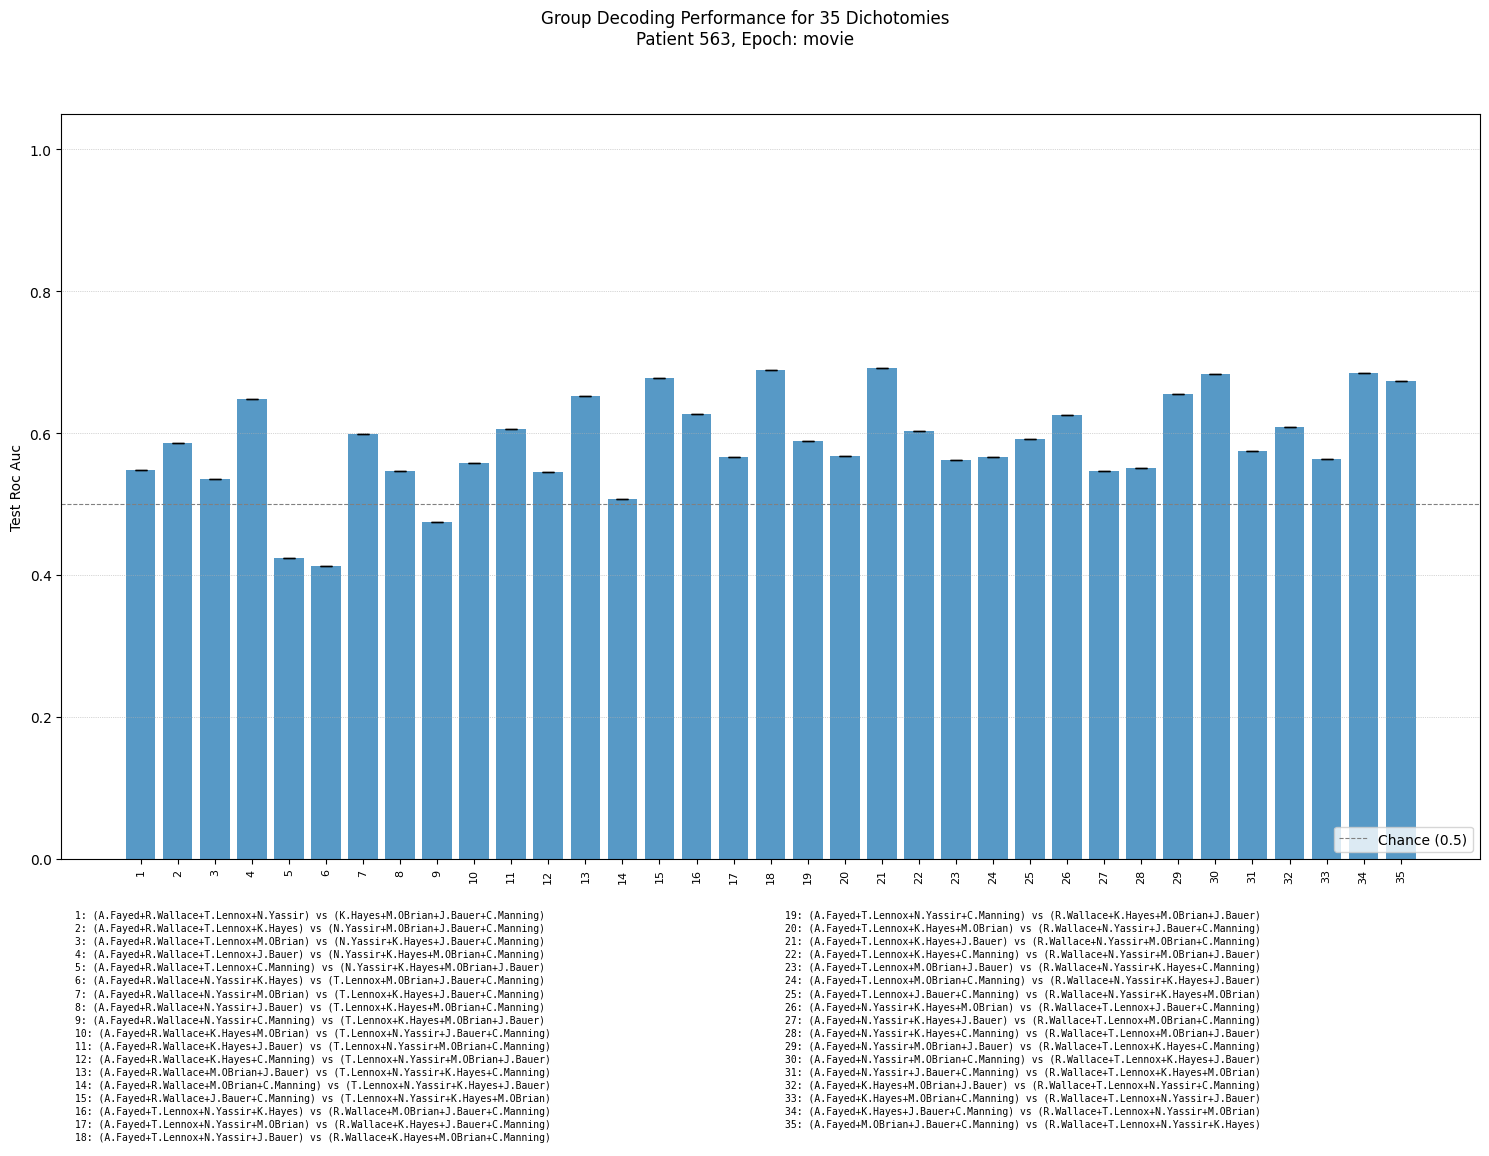

In [30]:
plot_dichotomy_performance_with_key(group_manager, combinations, metric='test_roc_auc')


# Group decoding 2: p563 pseudopops
possibilities:
- pseudo
- multiple patients
- multiple iters (multiplies amount of time decoding)

for now, lets do pseudo, have to imp for multiple patients (revising the multi_decoding classes) - i messed up cuz multiple manager was flexible to all sizes, shouldn't be too bad tho.

In [35]:
pseudo_group_manager = SingleResultsManager(
    patient_data=p563,
    concept_items=combinations,  # Note: using 'concept_items' instead of 'concept_pairs'
    epoch='movie',
    classifier=LinearSVC(random_state=42),
    standardize=True,
    pseudo=True,  # Use pseudopopulations for balanced datasets
    neurons=p563_mtl_fr_neurons
)


In [36]:
num_iter = 1
pseudo_group_manager.run_decoding(num_iter=num_iter)

Decoding for 563:   0%|          | 0/35 [00:00<?, ?it/s]

Decoding for 563:   6%|▌         | 2/35 [00:53<14:38, 26.62s/it]

Decoding for 563:   9%|▊         | 3/35 [01:19<14:07, 26.47s/it]

Decoding for 563:  11%|█▏        | 4/35 [01:46<13:43, 26.55s/it]

Decoding for 563:  14%|█▍        | 5/35 [02:12<13:10, 26.33s/it]

Decoding for 563:  20%|██        | 7/35 [03:05<12:25, 26.64s/it]

Decoding for 563:  23%|██▎       | 8/35 [03:32<12:02, 26.76s/it]

Decoding for 563:  26%|██▌       | 9/35 [03:59<11:34, 26.72s/it]

Decoding for 563:  29%|██▊       | 10/35 [04:25<11:03, 26.56s/it]

Decoding for 563:  31%|███▏      | 11/35 [04:51<10:35, 26.48s/it]

Decoding for 563:  34%|███▍      | 12/35 [05:17<10:05, 26.31s/it]

Decoding for 563:  37%|███▋      | 13/35 [05:45<09:47, 26.69s/it]

Decoding for 563:  46%|████▌     | 16/35 [07:06<08:33, 27.05s/it]

Decoding for 563:  49%|████▊     | 17/35 [07:33<08:04, 26.93s/it]

Decoding for 563:  51%|█████▏    | 18/35 [07:59<07:35, 26.77s/it]

Decoding for 563:  57%|█████▋    | 20/35 [08:52<06:38, 26.59s/it]

Decoding for 563:  60%|██████    | 21/35 [09:19<06:14, 26.72s/it]

Decoding for 563:  63%|██████▎   | 22/35 [09:46<05:47, 26.75s/it]

Decoding for 563:  66%|██████▌   | 23/35 [10:12<05:19, 26.64s/it]

Decoding for 563:  69%|██████▊   | 24/35 [10:38<04:50, 26.37s/it]

Decoding for 563:  71%|███████▏  | 25/35 [11:05<04:25, 26.53s/it]

Decoding for 563:  74%|███████▍  | 26/35 [11:31<03:57, 26.44s/it]

Decoding for 563:  77%|███████▋  | 27/35 [11:58<03:32, 26.54s/it]

Decoding for 563:  80%|████████  | 28/35 [12:24<03:05, 26.47s/it]

Decoding for 563:  83%|████████▎ | 29/35 [12:51<02:40, 26.68s/it]

Decoding for 563:  89%|████████▊ | 31/35 [13:45<01:47, 26.85s/it]

Decoding for 563:  91%|█████████▏| 32/35 [14:11<01:19, 26.54s/it]

Decoding for 563:  94%|█████████▍| 33/35 [14:36<00:52, 26.15s/it]

Decoding for 563: 100%|██████████| 35/35 [15:31<00:00, 26.60s/it]


Expecting 35 dichotomies based on input list.
Processed results for 35/35 dichotomies.


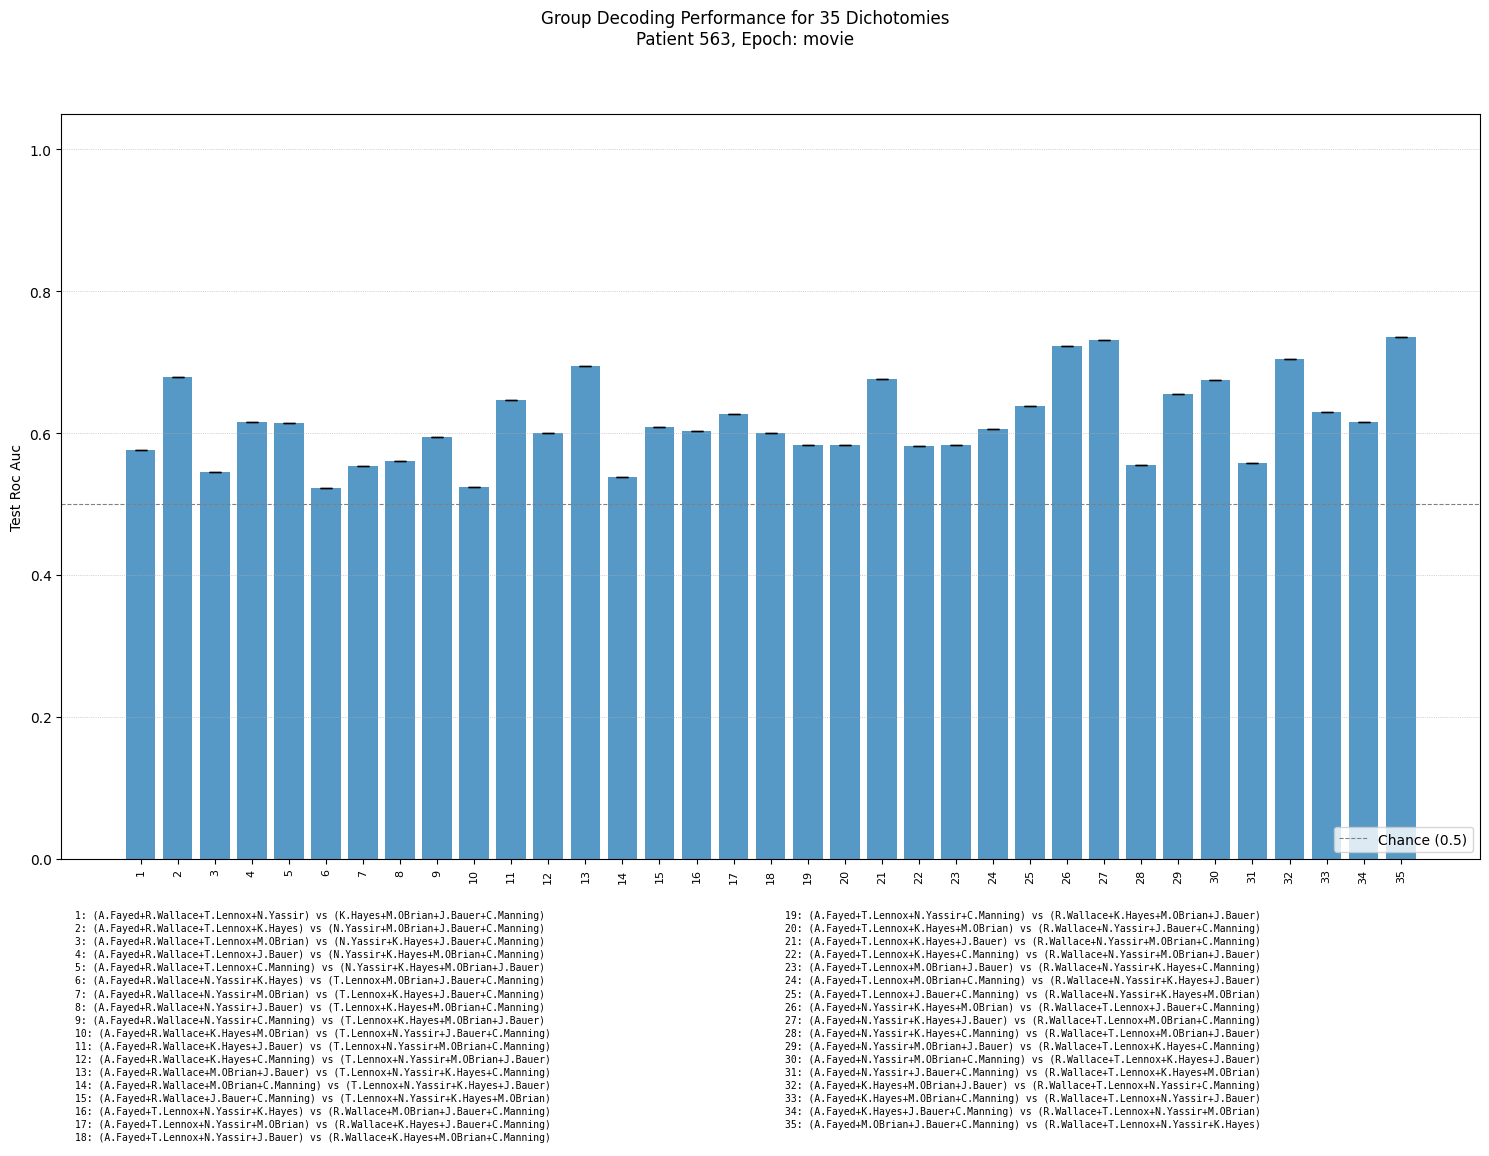

In [37]:
plot_dichotomy_performance_with_key(pseudo_group_manager, combinations, metric='test_roc_auc')

# Next step - identify potentially meaningful dichotomies

- use claude to generate potentially relevant axes

In [1]:
# iter 1 claude dichotomies
character_groupings = {
    "Action-Oriented vs. Strategic-Planning": (
        ("J.Bauer", "A.Fayed", "C.Manning", "R.Wallace"),
        ("T.Lennox", "K.Hayes", "N.Yassir", "M.OBrian")
    ),
    
    "Leaders vs. Operational Support": (
        ("T.Lennox", "K.Hayes", "A.Fayed", "J.Bauer"),
        ("N.Yassir", "M.OBrian", "C.Manning", "R.Wallace")
    ),
    
    "Risk Acceptance vs. Risk Aversion": (
        ("J.Bauer", "A.Fayed", "R.Wallace", "M.OBrian"),
        ("T.Lennox", "K.Hayes", "N.Yassir", "C.Manning")
    ),
    
    "Moral Absolutism vs. Moral Pragmatism": (
        ("K.Hayes", "R.Wallace", "A.Fayed", "J.Bauer"),
        ("T.Lennox", "N.Yassir", "C.Manning", "M.OBrian")
    ),
    
    "Individual Agency vs. Systems Thinking": (
        ("J.Bauer", "A.Fayed", "R.Wallace", "M.OBrian"),
        ("T.Lennox", "K.Hayes", "N.Yassir", "C.Manning")
    )
}

In [14]:
char_groupings = deepcopy(character_groupings)
for name, group in char_groupings.items():
    t1, t2 = group
    s1, s2 = set(t1), set(t2)
    for i, group_tup in enumerate(stable_groups):
        g1, _ = group_tup
        comb_s1  = set(g1)
        if s1 == comb_s1 or s2 == comb_s1:
            character_groupings[name] = [i, group]
character_groupings

{'Action-Oriented vs. Strategic-Planning': [14,
  (('J.Bauer', 'A.Fayed', 'C.Manning', 'R.Wallace'),
   ('T.Lennox', 'K.Hayes', 'N.Yassir', 'M.OBrian'))],
 'Leaders vs. Operational Support': [20,
  (('T.Lennox', 'K.Hayes', 'A.Fayed', 'J.Bauer'),
   ('N.Yassir', 'M.OBrian', 'C.Manning', 'R.Wallace'))],
 'Risk Acceptance vs. Risk Aversion': [12,
  (('J.Bauer', 'A.Fayed', 'R.Wallace', 'M.OBrian'),
   ('T.Lennox', 'K.Hayes', 'N.Yassir', 'C.Manning'))],
 'Moral Absolutism vs. Moral Pragmatism': [10,
  (('K.Hayes', 'R.Wallace', 'A.Fayed', 'J.Bauer'),
   ('T.Lennox', 'N.Yassir', 'C.Manning', 'M.OBrian'))],
 'Individual Agency vs. Systems Thinking': [12,
  (('J.Bauer', 'A.Fayed', 'R.Wallace', 'M.OBrian'),
   ('T.Lennox', 'K.Hayes', 'N.Yassir', 'C.Manning'))]}

# Decoding 3: multiple patient pseudopops

idea: 2x2 concept decoding: man vs woman axis, white vs arab descent axis

 K Hayes - T Lennox

Y Nassir - A Fayed

